In [132]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [133]:
#reading data from csv file
data=pd.read_csv('GOOG.csv')

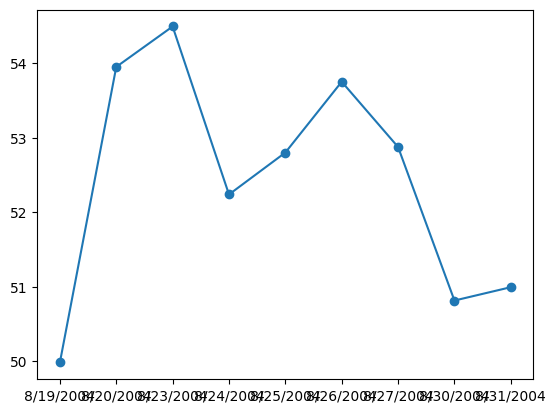

In [134]:
#selecting close feature for prediction
data_close=data.reset_index()['Close']
data_date=data.reset_index()['Date']
#data_date=data['Date']
#data_close=data['Close']
plt.plot_date(data_date[:9],data_close[:9],linestyle='solid')


In [135]:
#PREPROCESSING: converting data range from 0 to 1 as LSTM is data sensitive 
scale=MinMaxScaler(feature_range=(0,1))
data_close=scale.fit_transform(np.array(data_close).reshape(-1,1))

In [136]:
#train and test dataset splitting
train_data=data_close[:2000]
test_data=data_close[2000:]

In [137]:
train_data

array([[1.32809895e-04],
       [3.34030536e-03],
       [3.77897219e-03],
       ...,
       [2.04265763e-01],
       [2.04434776e-01],
       [2.06595926e-01]])

In [138]:
test_data

array([[0.21528877],
       [0.21421826],
       [0.21448789],
       ...,
       [0.91036243],
       [0.91941098],
       [0.93651447]])

In [139]:
#function to create X,Y for train and test datasets
def create_dataset(dataset,timestep):
    X=[]
    Y=[]
    for i in range(len(dataset)-timestep-1):
        X.append(dataset[i:i+timestep])
        Y.append(dataset[i+timestep,0])
    return np.array(X),np.array(Y)

In [140]:
#creating train and test data sets
#taking timestep as 100
X_train,Y_train=create_dataset(train_data,100)
X_test,Y_test=create_dataset(test_data,100)

In [141]:
len(X_test), len(Y_test)

(1708, 1708)

In [142]:
#reshaping data into 3 dimesnios i.e.  (samples,timestep,1)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [143]:
#creating stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))#adding 1st layer of LSTM model
model.add(LSTM(50,return_sequences=True))#adding 2nd LSTM layer
model.add(LSTM(50))#adding 3rd LSTM layer
model.add(Dense(1))#adding final output to LSTM model
model.compile(loss='mean_squared_error',optimizer='adam')

In [144]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_22 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [146]:
#training LSTM model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 10, 1), found shape=(None, 100, 1)


In [128]:
#predicting values using LSTM model
Y_predicted=model.predict(X_test)


ValueError: in user code:

    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\artha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 10, 1), found shape=(32, 100, 1)


In [129]:
#displaying predicted values
Y_predicted


array([[0.62162316],
       [0.52689993],
       [0.40431604],
       [0.29057986],
       [0.19626026],
       [0.14015391],
       [0.17298393],
       [0.17376046],
       [0.18771724],
       [0.20221572],
       [0.12499192],
       [0.0645826 ],
       [0.        ],
       [0.02559448],
       [0.0607896 ],
       [0.13441089],
       [0.1981018 ],
       [0.283459  ],
       [0.343155  ],
       [0.34816608],
       [0.3158358 ],
       [0.2656358 ],
       [0.20970921],
       [0.17161088],
       [0.1419442 ],
       [0.11331657],
       [0.12207296],
       [0.17242078],
       [0.24288279],
       [0.3026846 ],
       [0.3864399 ],
       [0.49002278],
       [0.55278885],
       [0.6217612 ],
       [0.7200851 ],
       [0.8078131 ],
       [0.8714799 ],
       [0.9457822 ],
       [1.        ]], dtype=float32)

In [130]:
Y_test


array([0.20217705, 0.20078459, 0.20162169, ..., 0.9333636 , 0.91036243,
       0.91941098])

In [ ]:
#converting predicted data in range from 0 to 1
#Y_predicted=scale.inverse_transform(Y_predicted)
#Y_test=scale.inverse_transform(Y_test)
Y_predicted=scale.fit_transform(np.array(Y_predicted).reshape(-1,1))

In [ ]:
#finding mean squared error for predicted and original values
math.sqrt(mean_squared_error(Y_test,Y_predicted))

In [ ]:
#plotting graphs
plt.plot(data_date[:10],Y_test[:10])
plt.plot(data_date[:10],Y_predicted[:10])
#plt.gcf().autofmt_data_date()
